# Supervised Learning Sensitivity Analysis

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [36]:
#Best Performing Model
model = RandomForestClassifier(random_state = 42)
model

RandomForestClassifier(random_state=42)

In [3]:
#Load Data
with open('out/df_final.pkl', 'rb') as f:
    df = pickle.load(f)
df.head()

,topic_label,type_of_material_Biography,type_of_material_Brief,type_of_material_Correction,type_of_material_Editorial,type_of_material_First Chapter,type_of_material_Interview,type_of_material_Letter,type_of_material_List,type_of_material_News,...,world,would,write,writer,writing,yankee,yankees,yearold,yet,young
0,Lifestyle,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,Lifestyle,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,Lifestyle,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,Politics,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.159553,0.0
4,Lifestyle,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [4]:
features = df.drop('topic_label', axis = 1)
labels = df['topic_label']

In [5]:
#Set Random State and Cross-Val Strategy
random_state = 42
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

**Analyzing the effect of the n_components parameter on ROC-AUC Score**

In [6]:
scores = []
for i in range(100,450,50):
    model.n_estimators = i
    scores.append(cross_val_score(model, features, labels, 
                                  cv = cv_strategy, scoring = 'roc_auc_ovr', n_jobs = -1).mean())

Text(0.5, 1.0, 'Mean ROC_AUC Score for n_estimators Parameter')

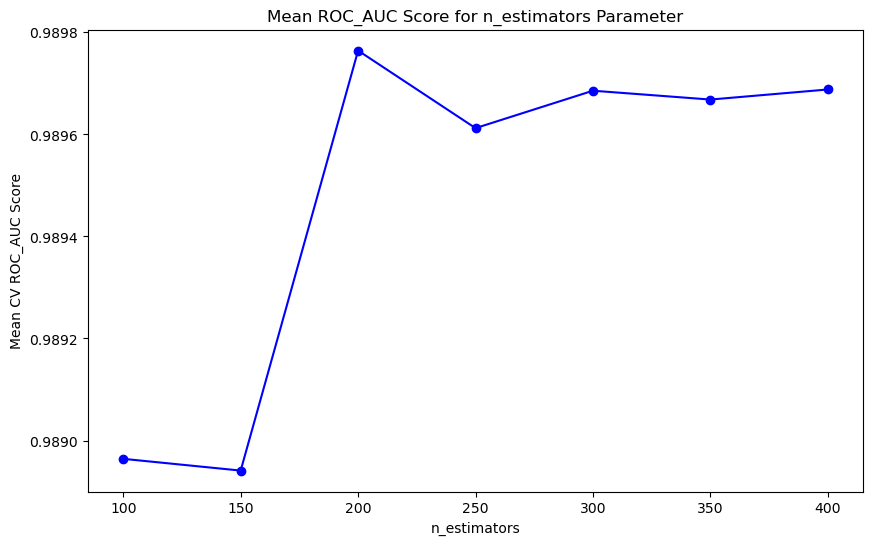

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(100,450,50), scores, marker = 'o', color = 'b', linestyle = '-')
plt.xlabel('n_estimators')
plt.ylabel('Mean CV ROC_AUC Score')
plt.title('Mean ROC_AUC Score for n_estimators Parameter')

We can see here that as we vary the n_estimators parameter, the mean ROC-AUC score remains very high and the differences in the scores among the n_estimators component is not very significant. In the plot above we see that n_estimators = 200 gives the highest score. This is the default parameter setting for n_estimators. When we vary the random_state value, we get a different random splits and the n_estimators paramter that gives the highest ROC-AUC score is different. However, it is still quite high and the difference between the scores isn't very significant. This shows that the model isn't very sensitive to the n_estimators parameter.

**Analyzing the effect of the max_features parameter**

In [8]:

scores = []
for m in ['sqrt', 'log2', None]:
    model.n_estimators = 200
    model.max_features = m
    scores.append(cross_val_score(model, features, labels, 
                                  cv = cv_strategy, scoring = 'roc_auc_ovr', n_jobs = -1).mean())

Text(0.5, 1.0, 'Mean ROC_AUC Score for max_features Parameter')

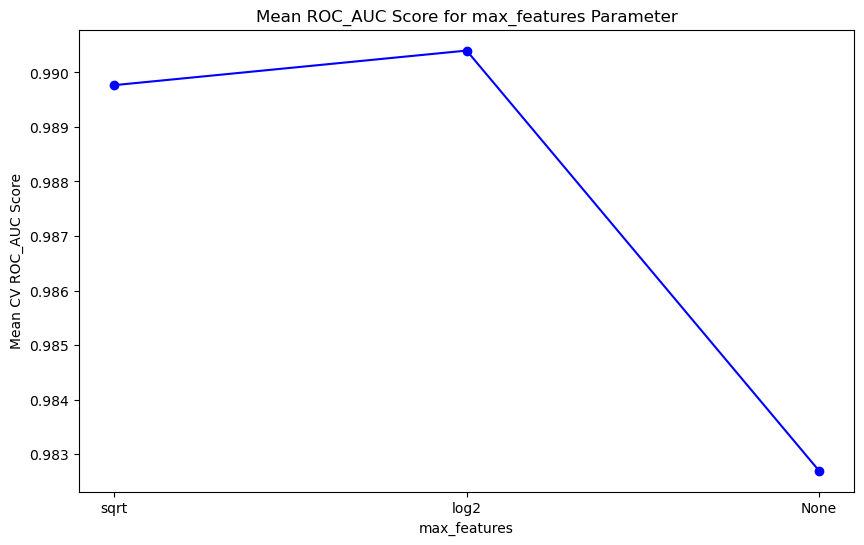

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(['sqrt', 'log2', 'None'], scores, marker = 'o', color = 'b', linestyle = '-')
plt.xlabel('max_features')
plt.ylabel('Mean CV ROC_AUC Score')
plt.title('Mean ROC_AUC Score for max_features Parameter')

We see that in the above plot, setting the max_features parameter to 'log2' gives the highest mean ROC-AUC score, however, again it isn't a drastic difference from the scores given by 'sqrt' and None, and all the scores are quite high. This shows that while there may be some variation in the ROC-AUC score when we vary the max_features parameter, it isn't a very significant difference.

**Analyzing the effect of varying features**

In [27]:
#View all features
feature_list = features.columns.values.tolist()
#feature_list

In [28]:
#Reset model parameters to default
model.n_estimators = 200
model.max_features = 'sqrt'

In [29]:
#Shuffle features
random.shuffle(feature_list)
#feature_list

In [30]:
scores = []
for i in range(50,1100,50):
    columns = ['topic_label'] + feature_list[:i]
    drop_df = df[columns]
    d_features = drop_df.drop('topic_label', axis = 1)
    d_labels = drop_df['topic_label']
    scores.append(cross_val_score(model, d_features, d_labels, 
                                  cv = cv_strategy, scoring = 'roc_auc_ovr', n_jobs = -1).mean())

In [31]:
scores

[0.7957939709990164,
 0.8674646972309812,
 0.9277465477539184,
 0.9314788191070624,
 0.9333817406103899,
 0.9361709375370824,
 0.947084734869032,
 0.955700795138035,
 0.9626207415362182,
 0.9633789374920069,
 0.9695037737990292,
 0.9794445104727494,
 0.9799024909919007,
 0.9796439933291904,
 0.9807833387192801,
 0.9819703518181327,
 0.9828119502912445,
 0.98395465330351,
 0.9865359305364493,
 0.9884389387851369,
 0.9889569623989957]

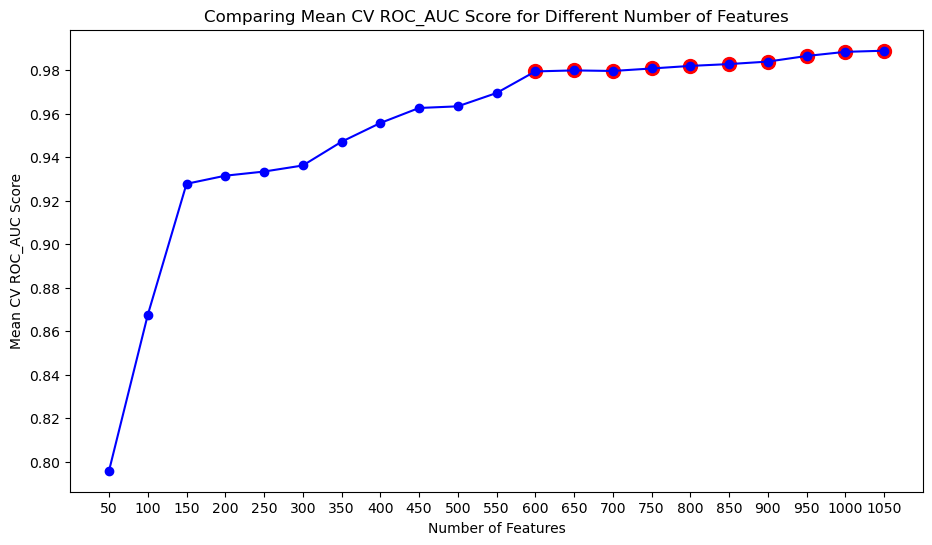

In [32]:
plt.figure(figsize=(11, 6))
plt.plot(np.arange(50,1100,50), scores, marker = 'o', color = 'b', linestyle = '-')
plt.xlabel('Number of Features')
plt.ylabel('Mean CV ROC_AUC Score')
plt.xticks(np.arange(50,1100,50))
plt.yticks(np.arange(round(min(scores),2), 1, 0.02))
plt.title('Comparing Mean CV ROC_AUC Score for Different Number of Features')
plt.scatter(np.arange(600,1100,50), scores[11:],c = 'red', s = 100)

Our original dataset had 1064 total features. In order to see what the effect of varying the number of features the model is trained on effects the ROC-AUC score, we varied the number of features from 50 to 1050, adding 50 features at a time, and comparing the scores. As we can see in the above plot, initially adding features would improve the score, but after around 600 features, adding more features didn't drastically improve the ROC-AUC score, and eventually the score plateaued. This shows that initially the model is sensitive to the number of features it is trained on, but after a certain point, adding more features doesn't significantly improve model performance. 